<a href="https://colab.research.google.com/github/kankekarsaurabh/Machine-learning/blob/main/creditscorec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, cohen_kappa_score
import shap

# Load data
data = pd.read_csv("/content/credit_score_cleaned_train.csv")

data.head(25)


,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,credit_history_age,...,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,89,...,11.27,4,Good,809.98,26.822620,No,80.415300,High_spent_Small_value_payments,312.49408,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,11.27,4,Good,809.98,31.944960,No,118.280220,Low_spent_Large_value_payments,284.62915,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,91,...,11.27,4,Good,809.98,28.609352,No,81.699524,Low_spent_Medium_value_payments,331.20987,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,92,...,6.27,4,Good,809.98,31.377861,No,199.458070,Low_spent_Small_value_payments,223.45131,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,93,...,11.27,4,Good,809.98,24.797346,No,41.420155,High_spent_Medium_value_payments,341.48923,2
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,94,...,9.27,4,Good,809.98,27.262259,No,62.430172,High_spent_Medium_value_payments,340.47922,2
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,95,...,11.27,4,Good,809.98,22.537594,No,178.344070,Low_spent_Small_value_payments,244.56532,2
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.8434,99,...,11.27,4,Good,809.98,23.933794,No,24.785217,High_spent_Medium_value_payments,358.12418,1
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.9866,111,...,5.42,2,Good,605.03,24.464031,No,104.291824,Low_spent_Small_value_payments,470.69060,1
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.9866,112,...,7.42,2,Good,605.03,38.550850,No,40.391240,High_spent_Large_value_payments,484.59122,2


Credit Score Distribution:
 credit_score
1    51503
0    27485
2    17708
Name: count, dtype: int64


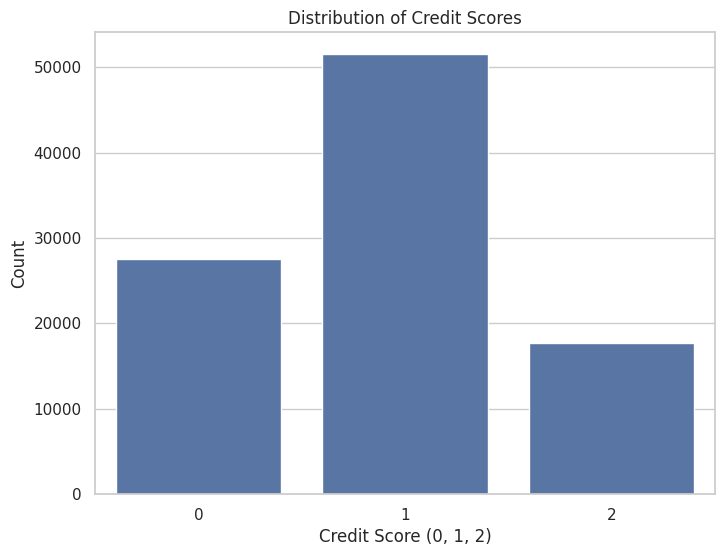

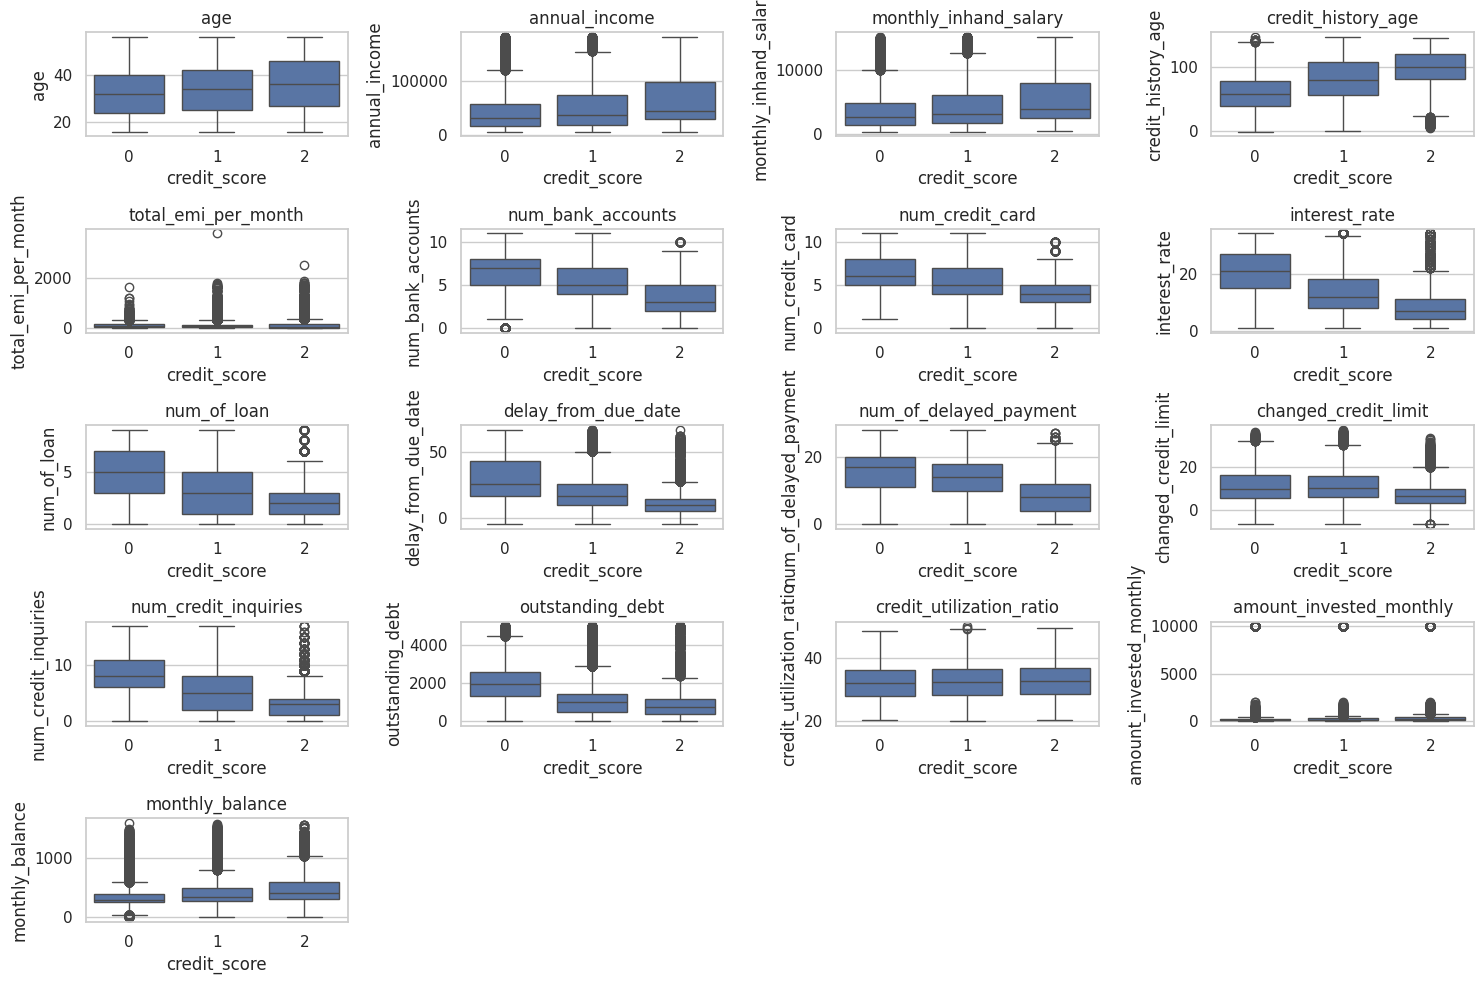

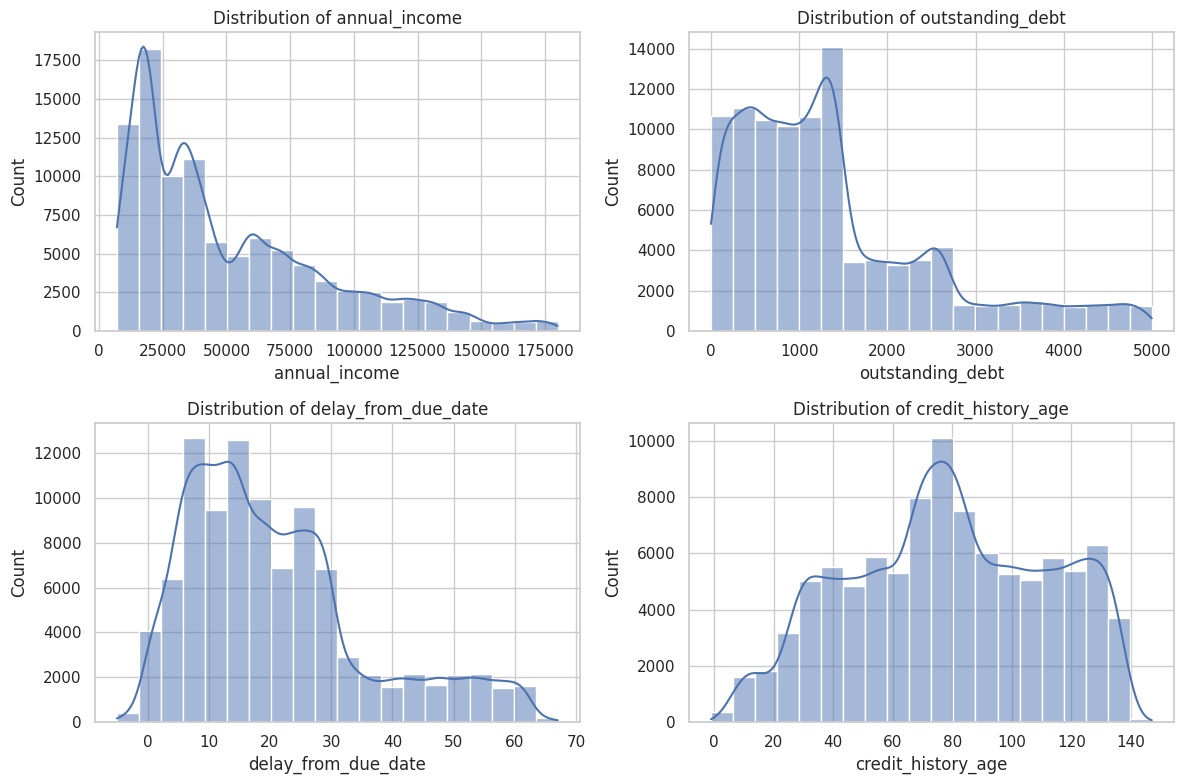

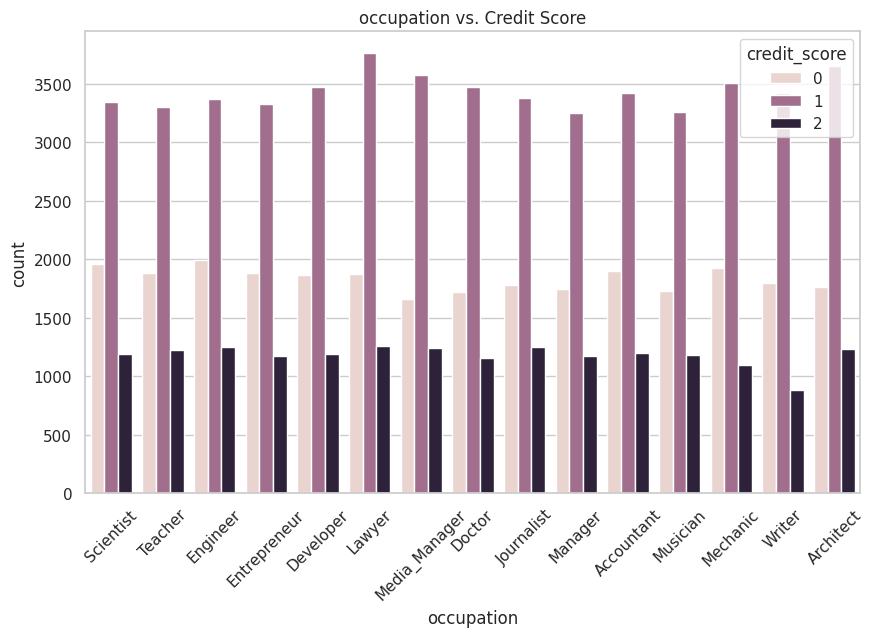

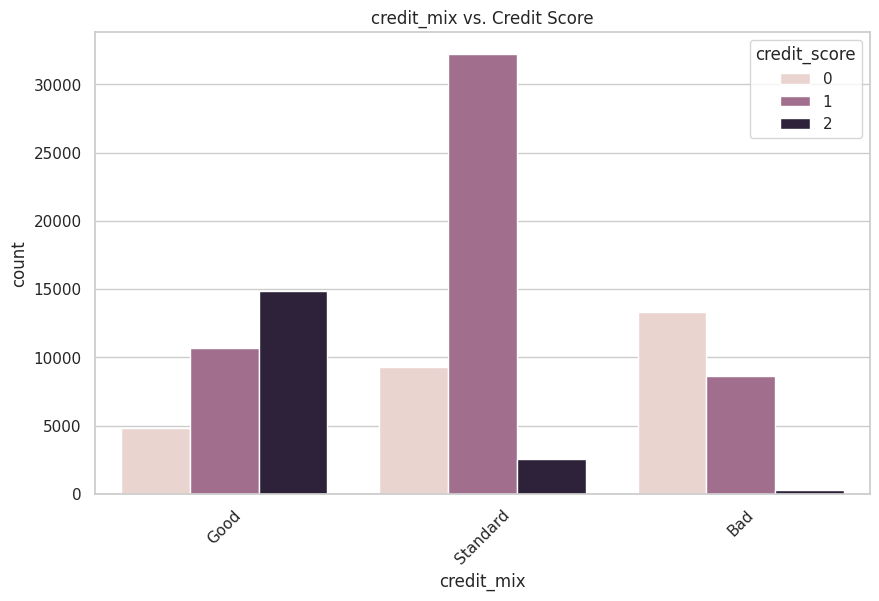

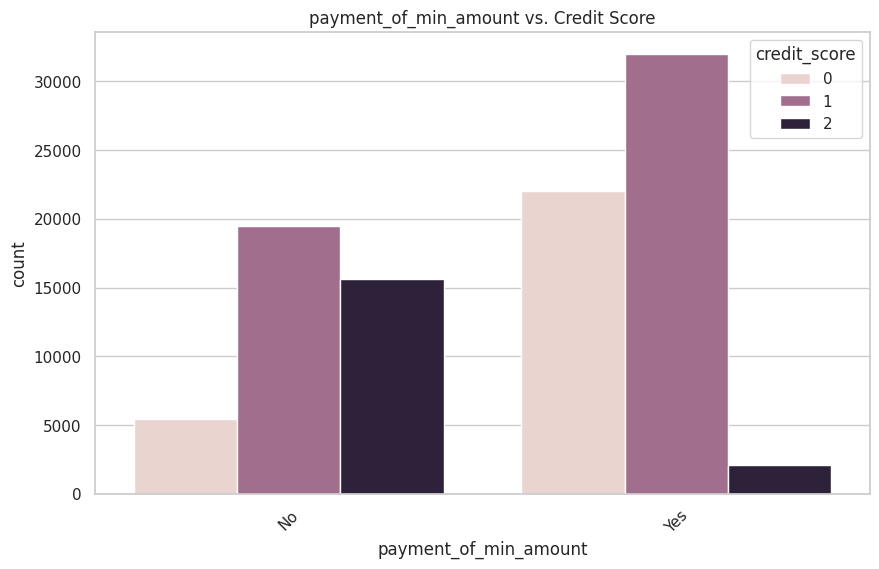

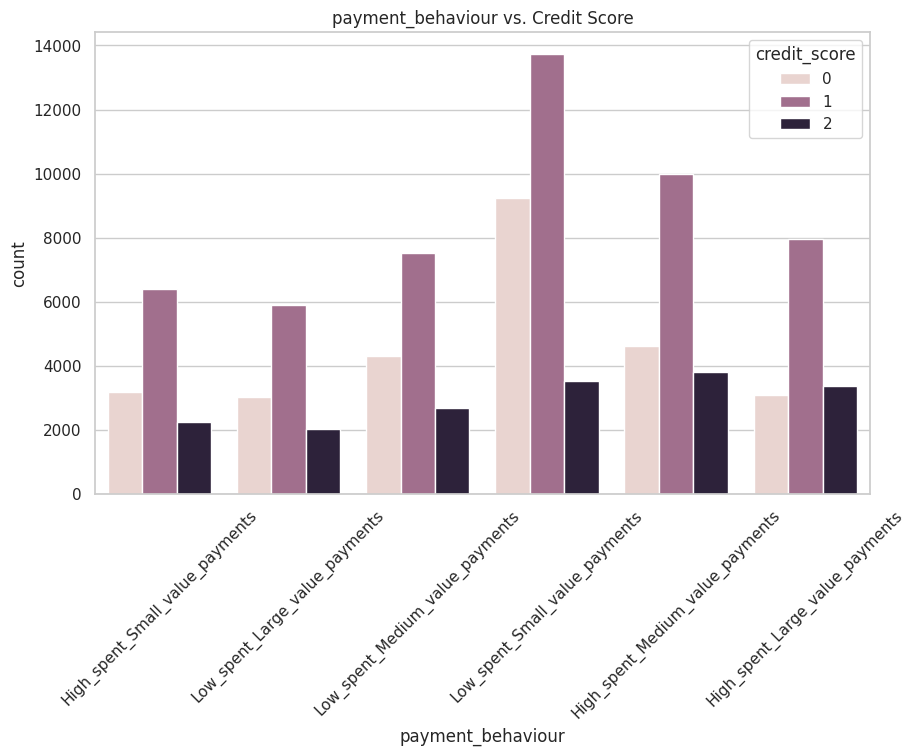

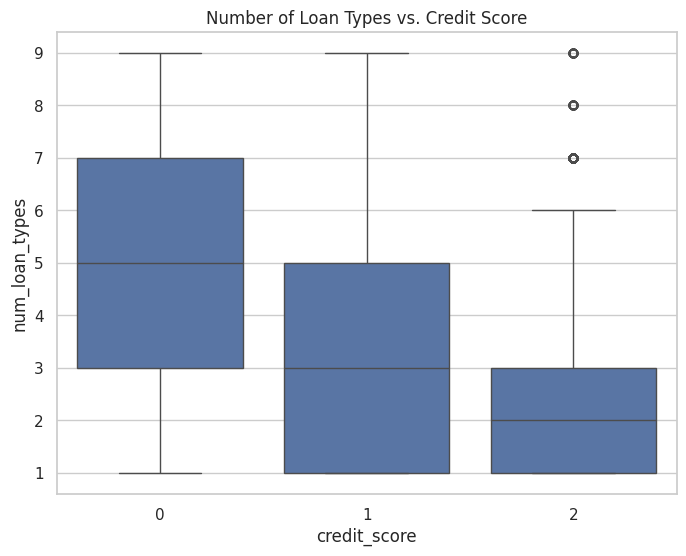

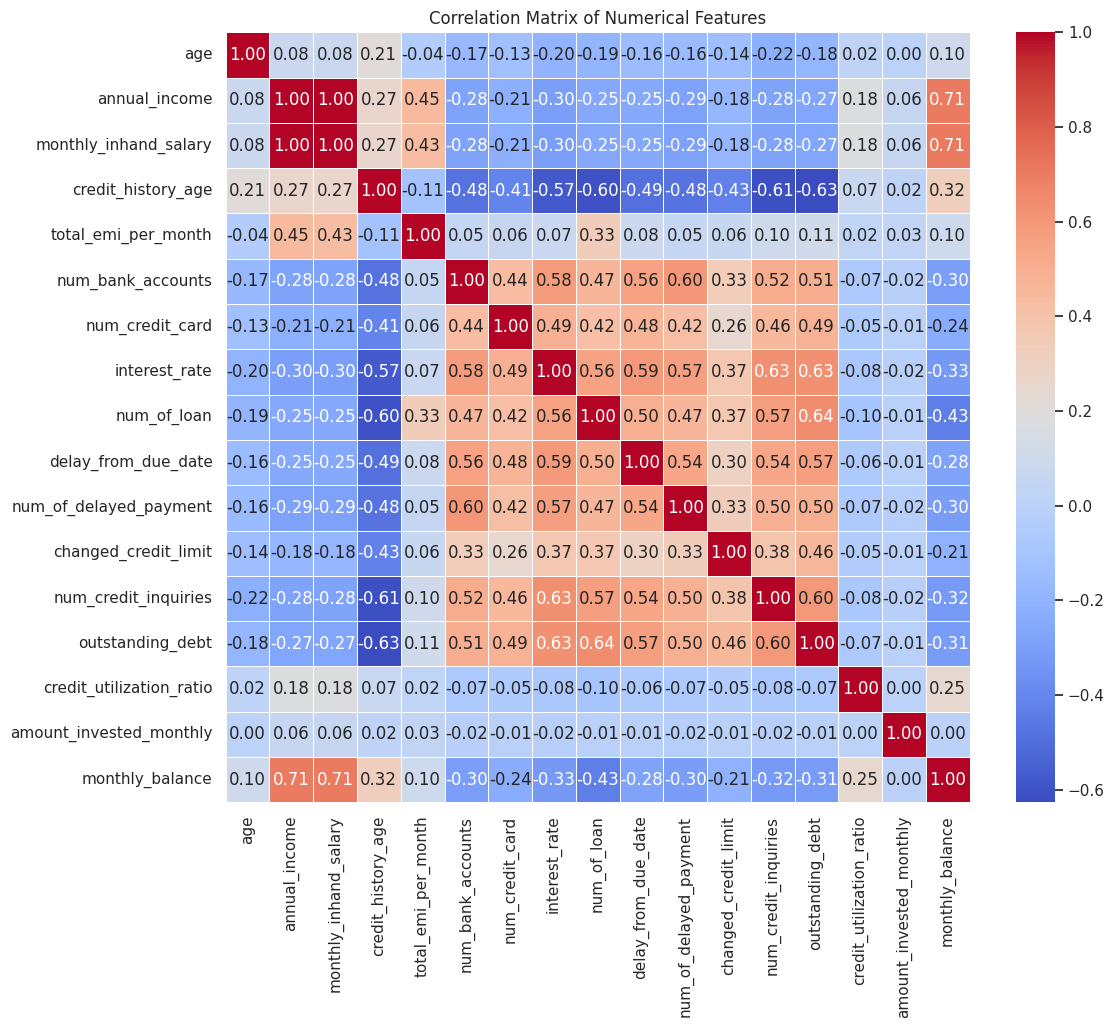

Missing Values:
 id                          0
customer_id                 0
month                       0
name                        0
age                         0
ssn                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
credit_history_age          0
total_emi_per_month         0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
payment_of_min_amount       0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
num_loan_types              0
dtype: int64


In [5]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Target Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='credit_score', data=data)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score (0, 1, 2)')
plt.ylabel('Count')
print("Credit Score Distribution:\n", data['credit_score'].value_counts())
plt.show()

# 2. Numerical Features
numerical_cols = ['age', 'annual_income', 'monthly_inhand_salary', 'credit_history_age',
                  'total_emi_per_month', 'num_bank_accounts', 'num_credit_card',
                  'interest_rate', 'num_of_loan', 'delay_from_due_date',
                  'num_of_delayed_payment', 'changed_credit_limit',
                  'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
                  'amount_invested_monthly', 'monthly_balance']

# Boxplots for numerical features vs. credit_score
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x='credit_score', y=col, data=data)
    plt.title(col)
plt.tight_layout()
plt.show()

# Histograms for key numerical features
key_numerical = ['annual_income', 'outstanding_debt', 'delay_from_due_date', 'credit_history_age']
plt.figure(figsize=(12, 8))
for i, col in enumerate(key_numerical, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 3. Categorical Features
categorical_cols = ['occupation', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='credit_score', data=data)
    plt.title(f'{col} vs. Credit Score')
    plt.xticks(rotation=45)
    plt.show()

# Feature Engineering: Parse type_of_loan (count number of loans)
data['num_loan_types'] = data['type_of_loan'].apply(lambda x: len(eval(x)))
plt.figure(figsize=(8, 6))
sns.boxplot(x='credit_score', y='num_loan_types', data=data)
plt.title('Number of Loan Types vs. Credit Score')
plt.show()

# 4. Correlation Matrix (numerical features only)
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 5. Missing Values
print("Missing Values:\n", data.isnull().sum())


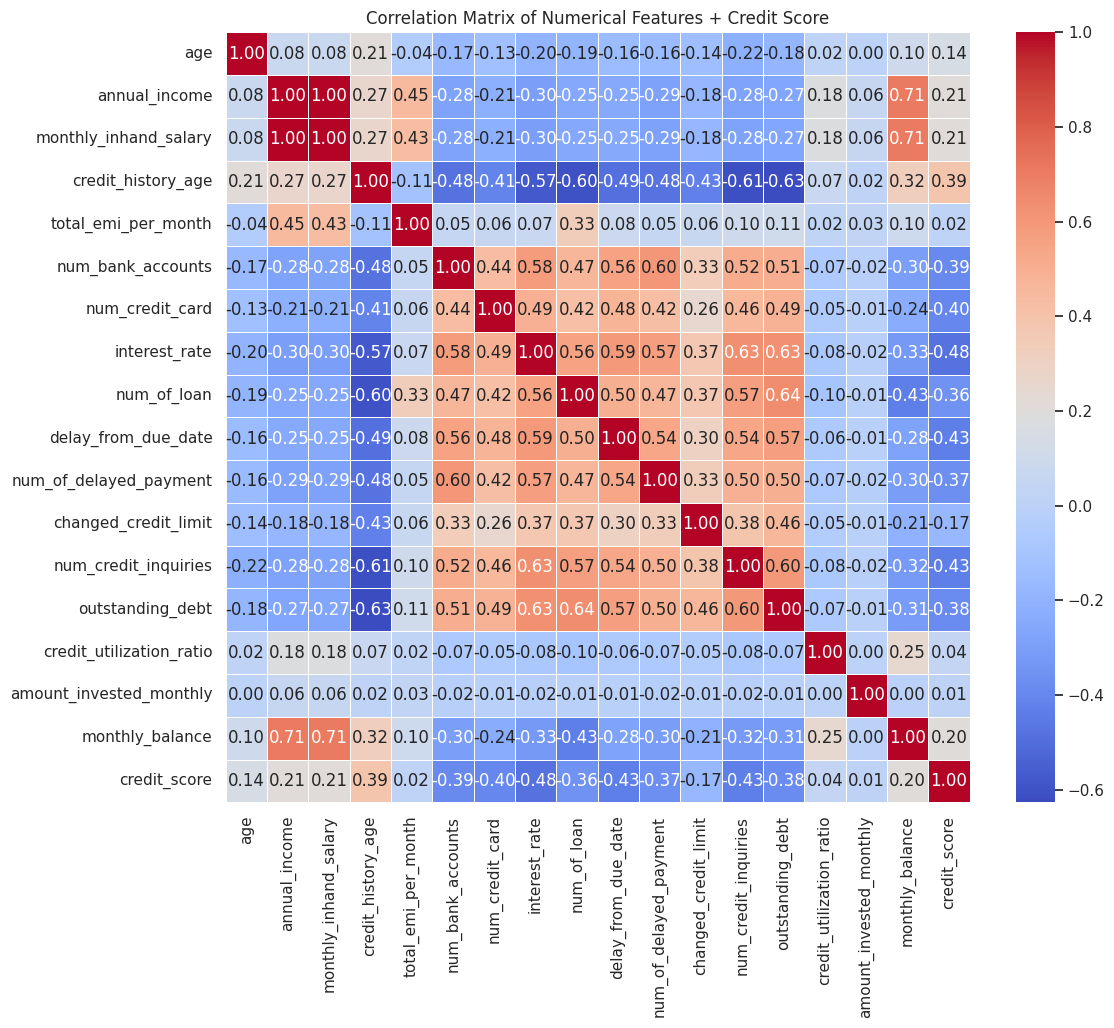

In [6]:


# Select numerical features + credit_score
numerical_cols = ['age', 'annual_income', 'monthly_inhand_salary', 'credit_history_age',
                 'total_emi_per_month', 'num_bank_accounts', 'num_credit_card',
                 'interest_rate', 'num_of_loan', 'delay_from_due_date',
                 'num_of_delayed_payment', 'changed_credit_limit',
                 'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
                 'amount_invested_monthly', 'monthly_balance', 'credit_score']
corr_matrix = data[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features + Credit Score')
plt.show()



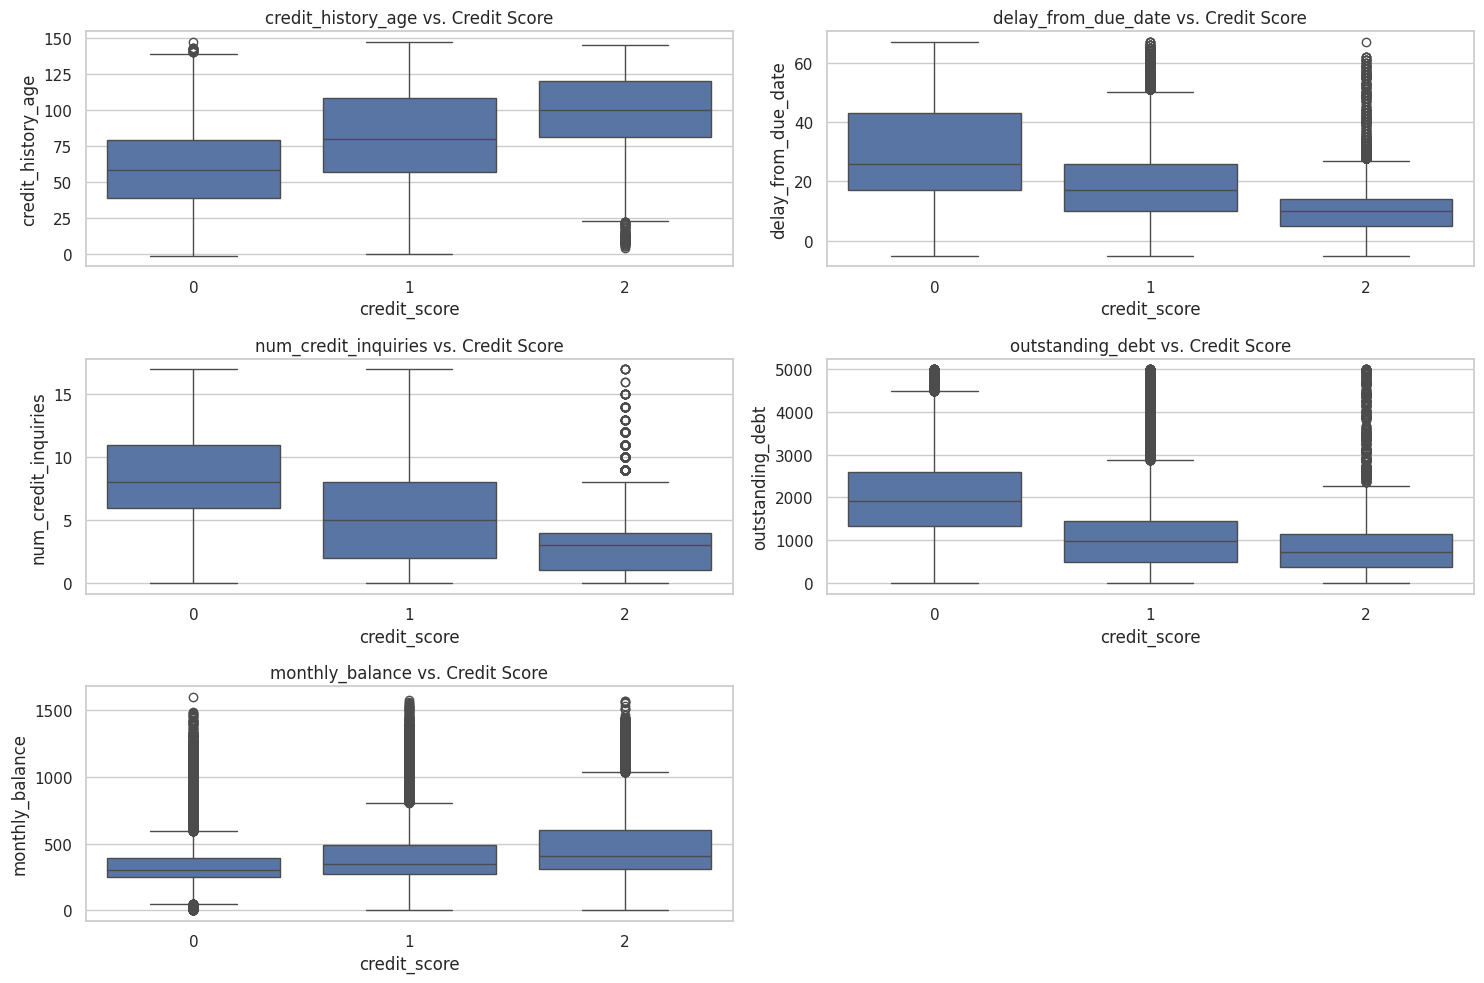

In [7]:

key_features = ['credit_history_age', 'delay_from_due_date', 'num_credit_inquiries', 'outstanding_debt', 'monthly_balance']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='credit_score', y=col, data=data)
    plt.title(f'{col} vs. Credit Score')
plt.tight_layout()
plt.show()

**Key Takeaways**

**Ordinal Nature Confirmed:**  The boxplots show a clear ordinal trend (0 < 1 < 2) for all features, supporting your use of Quadratic Weighted Kappa as the evaluation metric. For example:
credit_history_age increases from 0 to 2.
delay_from_due_date, num_credit_inquiries, and outstanding_debt decrease from 0 to 2.
monthly_balance increases from 0 to 2.

**Feature Importance:** These features (credit_history_age, delay_from_due_date, num_credit_inquiries, outstanding_debt, monthly_balance) are strong predictors, as expected from the correlations.

**Outliers:** Significant outliers, especially in Poor (0), suggest potential data issues or extreme cases (e.g., very high delays or debts). You might consider capping or investigating these outliers during preprocessing.

**Class Imbalance: **The distribution (53% 1, 28% 0, 18% 2) is visible in the boxplot widths, with Standard (1) having the largest sample size. This reinforces the need for class weights or sampling in modeling.

In [ ]:

# Drop irrelevant and redundant columns
data = data.drop(['id', 'customer_id', 'month', 'name', 'ssn', 'monthly_inhand_salary', 'amount_invested_monthly'], axis=1)

# Feature Engineering: Parse type_of_loan
data['num_loan_types'] = data['type_of_loan'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)

# Encode categorical variables
le = LabelEncoder()
data['credit_mix'] = le.fit_transform(data['credit_mix'])  # Bad=0, Standard=1, Good=2
data['payment_of_min_amount'] = data['payment_of_min_amount'].map({'No': 0, 'Yes': 1})

# One-hot encode
data = pd.get_dummies(data, columns=['occupation', 'payment_behaviour'], drop_first=True)

# Drop original type_of_loan after extracting num_loan_types
data = data.drop('type_of_loan', axis=1)

# Define features and target
X = data.drop('credit_score', axis=1)
y = data['credit_score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest with class weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
kappa = cohen_kappa_score(y_test, y_pred, weights="quadratic")
print(f"Quadratic Weighted Kappa: {kappa:.4f}")

# Feature Importance with SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

# Optional: Outlier capping (example for delay_from_due_date)
data['delay_from_due_date'] = data['delay_from_due_date'].clip(upper=60)  # Cap at 60 days

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      5497
           1       0.84      0.82      0.83     10301
           2       0.79      0.78      0.79      3542

    accuracy                           0.82     19340
   macro avg       0.81      0.81      0.81     19340
weighted avg       0.82      0.82      0.82     19340

Quadratic Weighted Kappa: 0.7988
